Esta red neural identifica imagenes en la base de datos de digitos manuscritos **mnist**. La intencion del ejercicio es mostrar lo facil que es crear y entrenar una red sencilla usando **Keras**. **Keras** es un "frontend" oficial de la libreria **Tensorflow**, escrita y liberada por Gooogle. Tanto Keras como Tensorflow son de las librerias mas usadas en deeplearning. 

Este ejercicio usa otras librerias de **Python**: implicitamente, a la libreria **numpy**, para la mainpulacion de array multidimensionales, y explicitamente, a la libreria grafica  **Matplotlib.pyplot** para mostar la imagen de un digito, a la libreria de machine learning **sklearn** para generar una "matriz de confusion", y a la libreria de manipulacion de tablas **Pandas**, para darle nombre a las columnas y renglones de esa matriz, todas ellas muy usadas de "data science".

In [0]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)


TensorFlow 2.x selected.
2.1.0


In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


El 'type' de train_images y train_labels es:
<class 'numpy.ndarray'> <class 'numpy.ndarray'> 

El tamaño de una imagen es:  (28, 28) 

El 'shape' de train_images y train_labels. Notese que son 60000 imagenes y 60000 etiquetas.
(60000, 28, 28) (60000,) 

El 'shape' de test_images y test_labels. Se reservaron 10000 datos para test.
(10000, 28, 28) (10000,) 

Los primeros 36 numeros del set de entrenamiento:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5] 

El dato 39 del set de train corresponde al numero 6
Asi se ve es numero manuscrito:


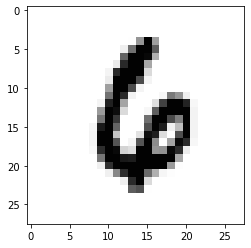

In [0]:
#### ESTA CELDA SOLO ES INFORMATIVA  ####

# ESTUDIAR LOS DATOS #
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Nuestros datos estan como arrays de numpy. Numpy es una libreria de python para trabajar con datos multi-dimensionales
print("El 'type' de train_images y train_labels es:")
print(type(train_images),type(train_labels),'\n')

# Podemos ver las dimensiones de los arrays X y Y, para los 2 datasets
print("El tamaño de una imagen es: ",train_images[0].shape,'\n')
print("El 'shape' de train_images y train_labels. Notese que son 60000 imagenes y 60000 etiquetas.")
print(train_images.shape,train_labels.shape,'\n')
print("El 'shape' de test_images y test_labels. Se reservaron 10000 datos para test.")
print(test_images.shape,test_labels.shape,'\n')

# Estos son los primeros 36 numeros en el set train
print("Los primeros 36 numeros del set de entrenamiento:")
print(train_labels[:36],'\n')

# VER UN NUMERO #
# matplotlib es una de las librerias graficas de python
%matplotlib inline

import matplotlib.pyplot as plt
image_num=39
print(f"El dato {image_num} del set de train corresponde al numero", train_labels[image_num])
print("Asi se ve es numero manuscrito:")
plt.imshow(train_images[image_num], cmap='Greys')
plt.show()


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
image_size = 28 * 28
train_images = train_images.reshape((60000, image_size))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, image_size))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [0]:
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(image_size,)))
network.add(layers.Dense(392, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [0]:
#### ESTA CELDA SOLO ES INFORMATIVA  ####

# ESTUDIAR EL MODELO #
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3930      
Total params: 927,090
Trainable params: 927,090
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#### ESTA CELDA SOLO ES INFORMATIVA  ####

# EVALUAR ANTES de ENTRENAR #
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)


10000/10000 [==============================] - 1s 145us/sample - loss: 2.3303 - accuracy: 0.0762
test_acc: 0.0762 test_loss 2.3303138397216796


In [0]:
run=network.fit(train_images, train_labels, epochs=5, batch_size=128)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0231 - accuracy: 0.9921
Epoch 2/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0187 - accuracy: 0.9938
Epoch 3/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0136 - accuracy: 0.9954
Epoch 4/5
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0160 - accuracy: 0.9944
Epoch 5/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0117 - accuracy: 0.9962


In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)


10000/10000 [==============================] - 1s 112us/sample - loss: 0.0833 - accuracy: 0.9818
test_acc: 0.9818 test_loss 0.08325724531034993


In [0]:
#### ESTA CELDA SOLO ES INFORMATIVA  ####

# EVALUAR con una MATRIZ DE CONFUSION #
from sklearn import metrics
import pandas as pd
pred_labels=network.predict(test_images)
matrix = metrics.confusion_matrix(test_labels.argmax(axis=1), pred_labels.argmax(axis=1))
matrix = pd.DataFrame(matrix, columns=range(10),index=range(10))
print(matrix)

     0     1     2    3    4    5    6     7    8    9
0  973     1     0    1    1    0    2     1    0    1
1    0  1122     2    2    0    0    2     1    5    1
2    3     0  1015    1    3    0    0     7    2    1
3    0     0     4  992    0    2    0     5    1    6
4    1     0     5    0  958    0    2     1    2   13
5    1     0     0   11    0  863    5     2    4    6
6    1     2     0    1    4    2  946     0    2    0
7    1     2     5    0    0    0    0  1015    1    4
8    5     0     4   10    0    1    0     4  943    7
9    1     2     0    2    7    2    0     3    1  991
